In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Train dataset 

In [3]:
train = pd.read_csv('train_health.csv')
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
#checking for null values
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

## Missing values 
Here data is categorical therefore we will apply mode for imputation. 

In [6]:
train['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [7]:
#replacing 14+ with 15.0
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].replace('14+',15.0)
#imputing missing values
train['Holding_Policy_Duration'].replace(np.nan,train['Holding_Policy_Duration'].mode()[0],inplace=True)
#coverting to string 
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].astype(float)

In [8]:
train['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [9]:
#imputing missing values
train['Health Indicator'].replace(np.nan,train['Health Indicator'].mode()[0],inplace=True)

In [10]:
train['Holding_Policy_Type'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [11]:
#imputing missing values
train['Holding_Policy_Type'].replace(np.nan,train['Holding_Policy_Type'].mode()[0],inplace=True)

In [12]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

### Using Label encoder for categorical variable

In [13]:
le=LabelEncoder()
train['City_Code']=le.fit_transform(train['City_Code'])
train['Health Indicator']=le.fit_transform(train['Health Indicator'])
train['Accomodation_Type']=le.fit_transform(train['Accomodation_Type'])
train['Reco_Insurance_Type']=le.fit_transform(train['Reco_Insurance_Type'])
train['Is_Spouse']=le.fit_transform(train['Is_Spouse'])

In [14]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,1,0,36,36,0,0,15.0,3.0,22,11628.0,0
1,2,31,1117,0,1,75,22,0,1,1.0,3.0,22,30510.0,0
2,3,31,3732,0,0,32,32,0,0,1.0,1.0,19,7450.0,1
3,4,16,4378,0,1,52,48,0,0,15.0,3.0,19,17780.0,0
4,5,34,2190,1,0,44,44,0,1,3.0,1.0,16,10404.0,0


### Dealing with Outlier 

ID


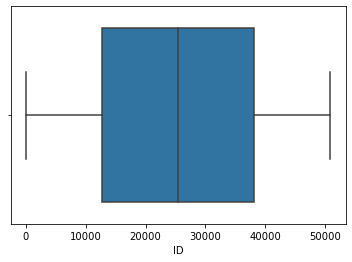

City_Code


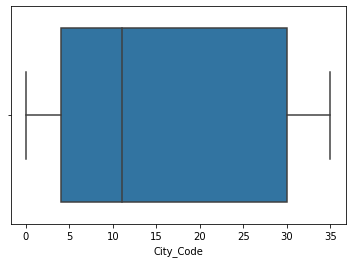

Region_Code


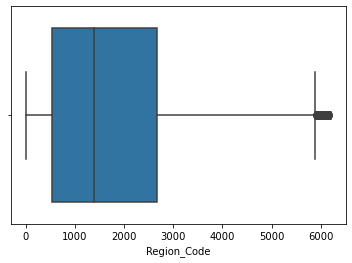

Accomodation_Type


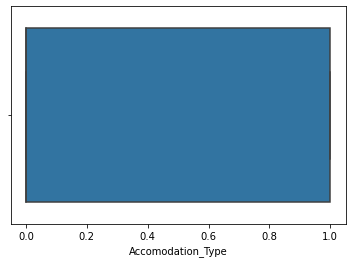

Reco_Insurance_Type


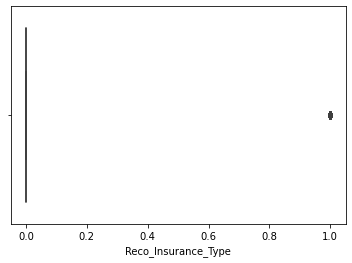

Upper_Age


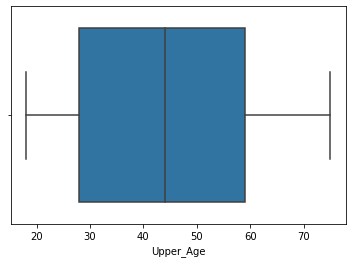

Lower_Age


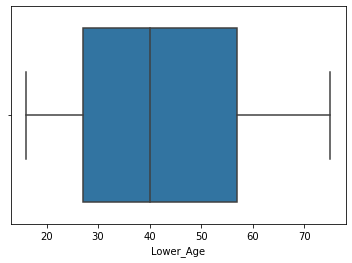

Is_Spouse


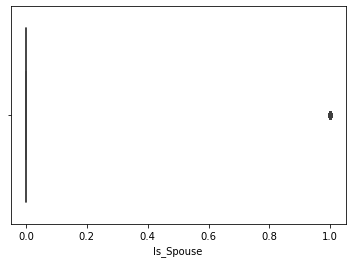

Health Indicator


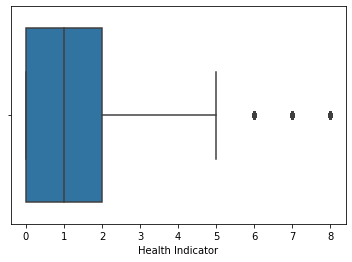

Holding_Policy_Duration


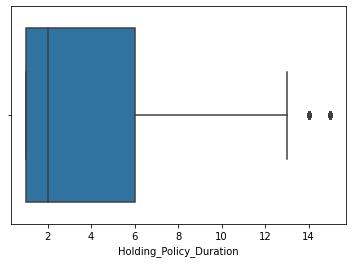

Holding_Policy_Type


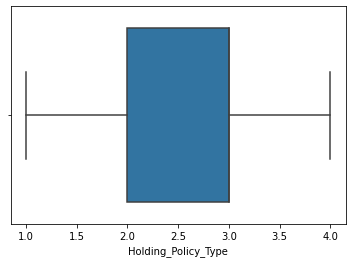

Reco_Policy_Cat


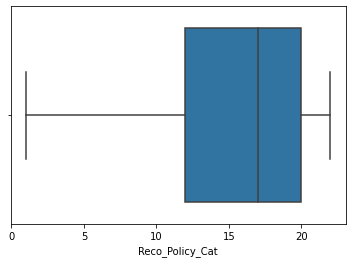

Reco_Policy_Premium


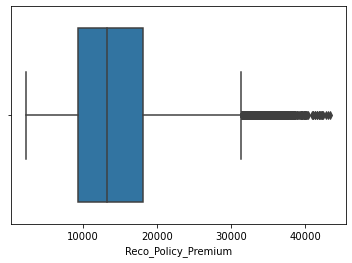

In [15]:
for col in train.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=train[col],data=train)
    plt.show()

We can observe some outiers, we will removeit.

ID


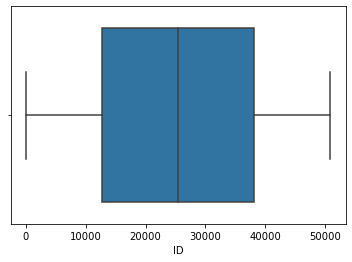

City_Code


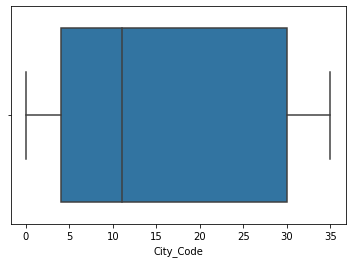

Region_Code


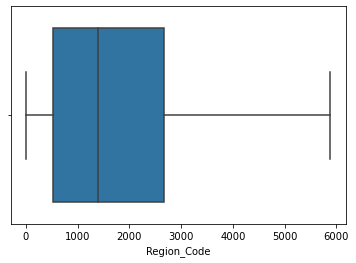

Accomodation_Type


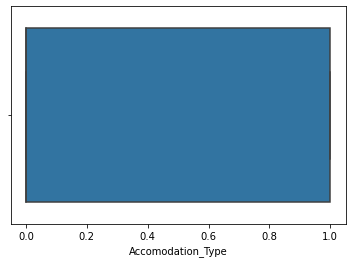

Reco_Insurance_Type


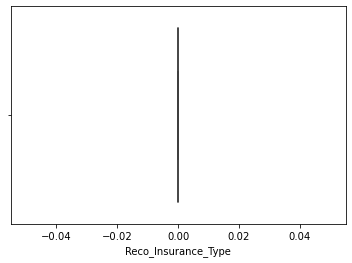

Upper_Age


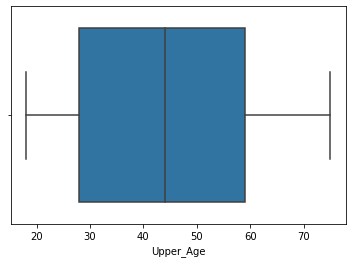

Lower_Age


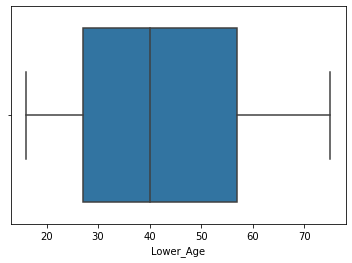

Is_Spouse


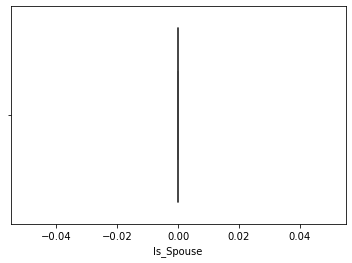

Health Indicator


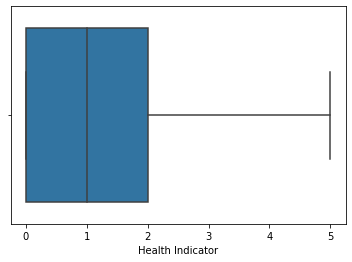

Holding_Policy_Duration


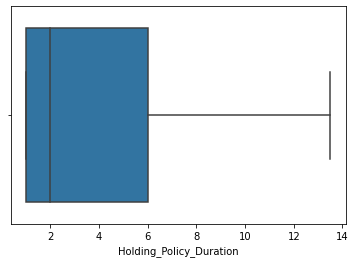

Holding_Policy_Type


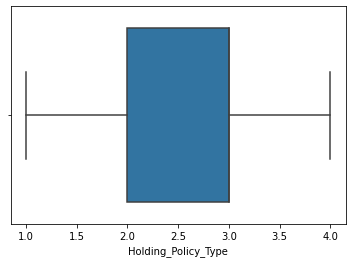

Reco_Policy_Cat


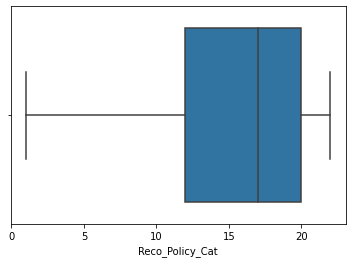

Reco_Policy_Premium


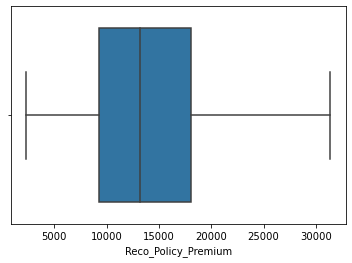

In [17]:
def boxoutlier(var):
    for x in var.iloc[:,:-1].columns :        
        Q1=var[x].quantile(0.25)
        Q3=var[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x]=np.where(var[x].values > Upper,Upper,var[x].values)
        var.loc[:,x]=np.where(var[x].values < Lower,Lower,var[x].values)
        
    return var
df1=boxoutlier(train)

for col in df1.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df1[col],data=df1)
    plt.show()

# Test Data 

In [18]:
test = pd.read_csv('test_health.csv')
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [19]:
test.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,1.037627,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


### Missing values

In [20]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [21]:
test['Holding_Policy_Duration'].unique()

array(['6.0', '3.0', '2.0', nan, '14+', '5.0', '1.0', '4.0', '12.0',
       '11.0', '7.0', '9.0', '13.0', '8.0', '14.0', '10.0'], dtype=object)

In [22]:
#replacing 14+ with 15.0
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].replace('14+',15.0)
#imputing missing values
test['Holding_Policy_Duration'].replace(np.nan,test['Holding_Policy_Duration'].mode()[0],inplace=True)
#coverting to string 
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].astype(float)

In [23]:
test['Health Indicator'].unique()

array([nan, 'X1', 'X3', 'X2', 'X5', 'X4', 'X7', 'X6', 'X9', 'X8'],
      dtype=object)

In [24]:
#imputing missing values
test['Health Indicator'].replace(np.nan,test['Health Indicator'].mode()[0],inplace=True)

In [28]:
test['Holding_Policy_Type'].unique()

array([ 3.,  4., nan,  1.,  2.])

In [29]:
#imputing missing values
test['Holding_Policy_Type'].replace(np.nan,test['Holding_Policy_Type'].mode()[0],inplace=True)

In [30]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

### Using Label encoder for categorical variable

In [31]:
le=LabelEncoder()
test['City_Code']=le.fit_transform(test['City_Code'])
test['Health Indicator']=le.fit_transform(test['Health Indicator'])
test['Accomodation_Type']=le.fit_transform(test['Accomodation_Type'])
test['Reco_Insurance_Type']=le.fit_transform(test['Reco_Insurance_Type'])
test['Is_Spouse']=le.fit_transform(test['Is_Spouse'])

In [32]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,0,156,0,0,30,30,0,0,6.0,3.0,5,11934.0
1,50884,30,7,0,1,69,68,1,0,3.0,3.0,18,32204.8
2,50885,0,564,1,0,28,28,0,2,2.0,4.0,17,9240.0
3,50886,22,1177,1,0,23,23,0,2,3.0,3.0,18,9086.0
4,50887,0,951,0,0,75,75,0,2,15.0,3.0,5,22534.0


### Dealing with Outlier

ID


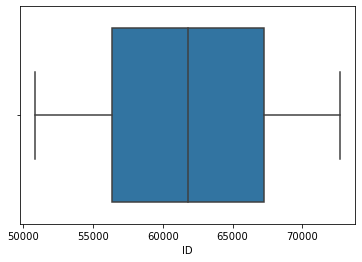

City_Code


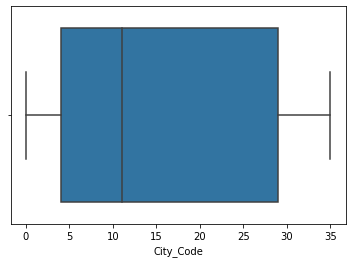

Region_Code


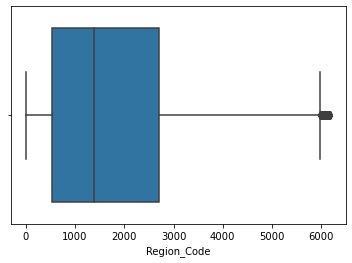

Accomodation_Type


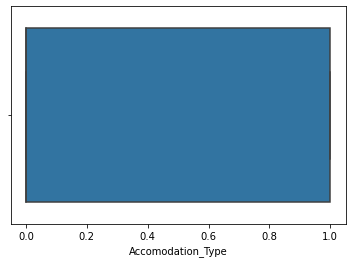

Reco_Insurance_Type


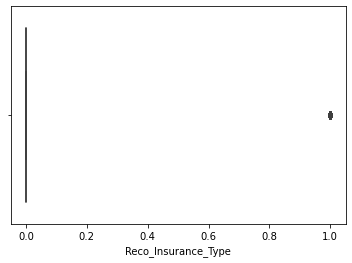

Upper_Age


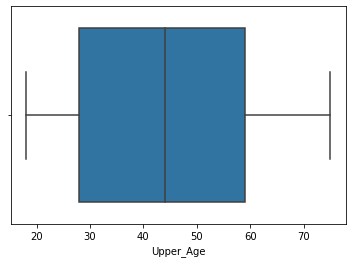

Lower_Age


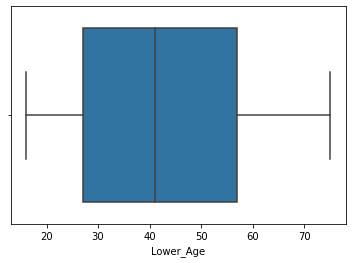

Is_Spouse


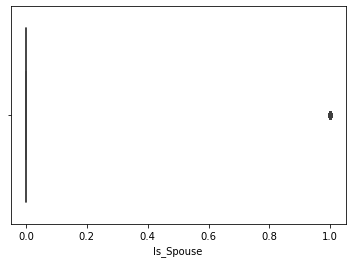

Health Indicator


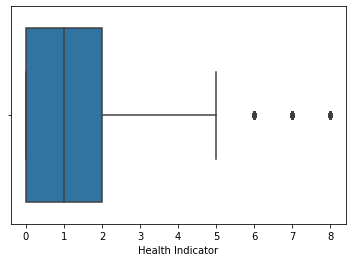

Holding_Policy_Duration


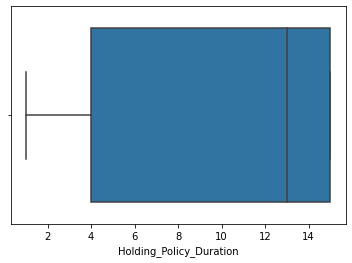

Holding_Policy_Type


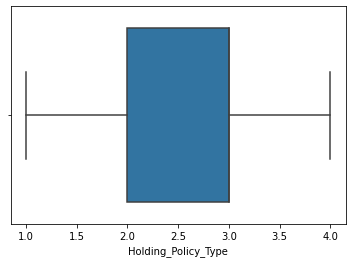

Reco_Policy_Cat


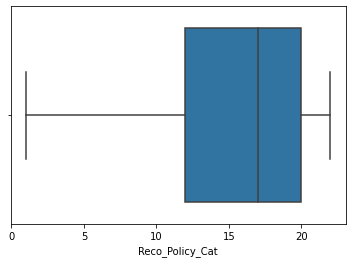

In [33]:
for col in test.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=test[col],data=test)
    plt.show()

ID


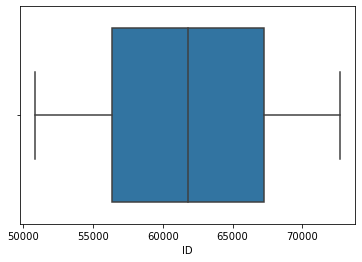

City_Code


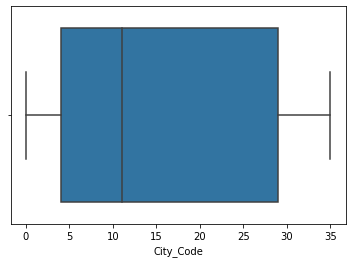

Region_Code


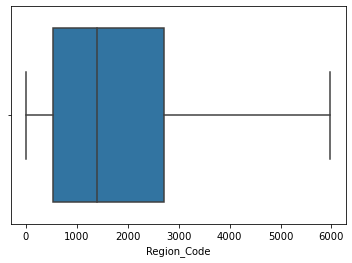

Accomodation_Type


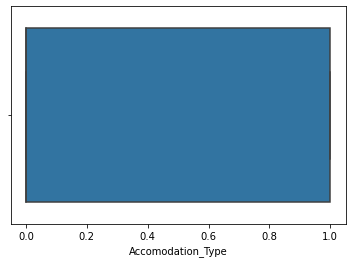

Reco_Insurance_Type


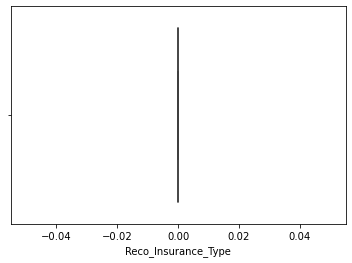

Upper_Age


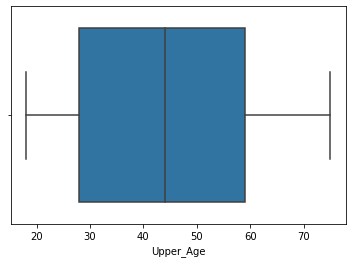

Lower_Age


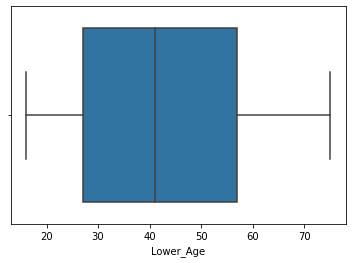

Is_Spouse


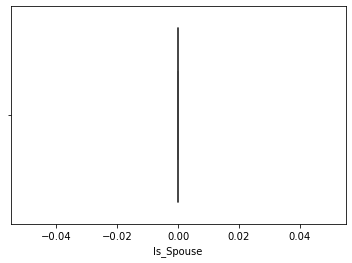

Health Indicator


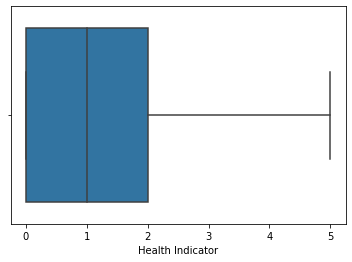

Holding_Policy_Duration


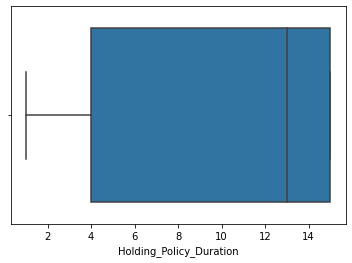

Holding_Policy_Type


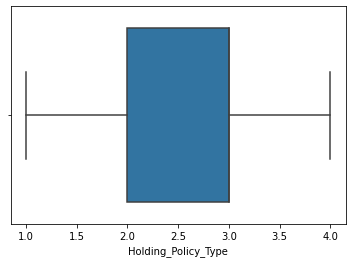

Reco_Policy_Cat


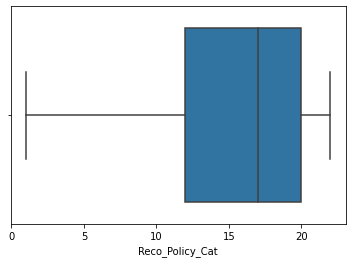

In [34]:
def boxoutlier(var):
    for x in var.iloc[:,:-1].columns :        
        Q1=var[x].quantile(0.25)
        Q3=var[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x]=np.where(var[x].values > Upper,Upper,var[x].values)
        var.loc[:,x]=np.where(var[x].values < Lower,Lower,var[x].values)
        
    return var
df2=boxoutlier(test)

for col in df2.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df2[col],data=df2)
    plt.show()

# Model building 

In [35]:
df1 = df1.drop(['ID'],axis=1)

In [36]:
df1.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22.0,3213.0,1.0,0.0,36.0,36.0,0.0,0.0,13.5,3.0,22.0,11628.0,0
1,31.0,1117.0,0.0,0.0,75.0,22.0,0.0,1.0,1.0,3.0,22.0,30510.0,0
2,31.0,3732.0,0.0,0.0,32.0,32.0,0.0,0.0,1.0,1.0,19.0,7450.0,1
3,16.0,4378.0,0.0,0.0,52.0,48.0,0.0,0.0,13.5,3.0,19.0,17780.0,0
4,34.0,2190.0,1.0,0.0,44.0,44.0,0.0,1.0,3.0,1.0,16.0,10404.0,0


### Splitting dataset

In [37]:
X = df1.drop(['Response'],axis=1)
y=df1['Response']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4 )

### Feature scaling

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Decision Tree Model

In [41]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
predict_test = d_tree.predict(X_test)
print(metrics.accuracy_score(predict_test,y_test),'\n')
print(metrics.classification_report(y_test, predict_test))
print(roc_auc_score(predict_test,y_test))

0.6743637614228162 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      7819
           1       0.31      0.34      0.32      2358

    accuracy                           0.67     10177
   macro avg       0.55      0.56      0.55     10177
weighted avg       0.68      0.67      0.68     10177

0.5534910040462342


[[6070 1749]
 [1565  793]]


<AxesSubplot:>

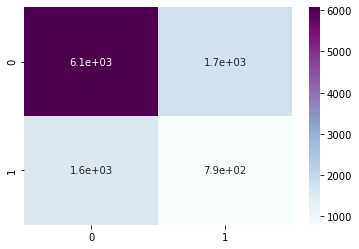

In [42]:
cm=confusion_matrix(y_test,predict_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

### Random Forest Model

In [43]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train,y_train)
predict_test = r_forest.predict(X_test)
print(metrics.accuracy_score(predict_test,y_test),'\n')
print(metrics.classification_report(y_test, predict_test))
print(roc_auc_score(predict_test,y_test))

0.7635845534047362 

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      7819
           1       0.38      0.03      0.06      2358

    accuracy                           0.76     10177
   macro avg       0.58      0.51      0.46     10177
weighted avg       0.68      0.76      0.68     10177

0.5768678372782985


[[7693  126]
 [2280   78]]


<AxesSubplot:>

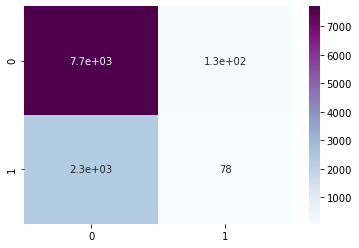

In [44]:
cm=confusion_matrix(y_test,predict_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

### XGBoost Classifier Model

In [45]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
predict_test = xgb.predict(X_test)
print(metrics.accuracy_score(predict_test,y_test),'\n')
print(metrics.classification_report(y_test, predict_test))
print(roc_auc_score(predict_test,y_test))

[18:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7650584651665521 

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      7819
           1       0.46      0.08      0.13      2358

    accuracy                           0.77     10177
   macro avg       0.62      0.52      0.50     10177
weighted avg       0.70      0.77      0.69     10177

0.617567739915522


[[7607  212]
 [2179  179]]


<AxesSubplot:>

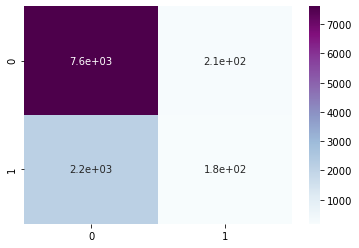

In [46]:
cm=confusion_matrix(y_test,predict_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

### Catboost Model 

In [47]:
cat= CatBoostClassifier()
cat.fit(X_train, y_train)
predict_test = cat.predict(X_test)
print(metrics.accuracy_score(predict_test,y_test),'\n')
print(metrics.classification_report(y_test, predict_test))
print(roc_auc_score(predict_test,y_test))

Learning rate set to 0.050148
0:	learn: 0.6776474	total: 177ms	remaining: 2m 57s
1:	learn: 0.6631574	total: 190ms	remaining: 1m 34s
2:	learn: 0.6502585	total: 204ms	remaining: 1m 7s
3:	learn: 0.6390303	total: 216ms	remaining: 53.9s
4:	learn: 0.6281703	total: 228ms	remaining: 45.3s
5:	learn: 0.6187065	total: 240ms	remaining: 39.8s
6:	learn: 0.6105609	total: 254ms	remaining: 36s
7:	learn: 0.6040658	total: 263ms	remaining: 32.6s
8:	learn: 0.5973719	total: 275ms	remaining: 30.3s
9:	learn: 0.5921016	total: 287ms	remaining: 28.4s
10:	learn: 0.5869188	total: 302ms	remaining: 27.2s
11:	learn: 0.5822636	total: 315ms	remaining: 26s
12:	learn: 0.5766704	total: 329ms	remaining: 25s
13:	learn: 0.5727974	total: 341ms	remaining: 24s
14:	learn: 0.5698460	total: 350ms	remaining: 23s
15:	learn: 0.5667073	total: 366ms	remaining: 22.5s
16:	learn: 0.5640476	total: 385ms	remaining: 22.2s
17:	learn: 0.5613955	total: 407ms	remaining: 22.2s
18:	learn: 0.5592517	total: 420ms	remaining: 21.7s
19:	learn: 0.556333

[[7723   96]
 [2253  105]]


<AxesSubplot:>

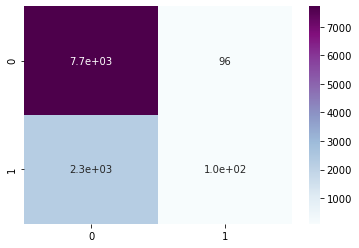

In [48]:
cm=confusion_matrix(y_test,predict_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

#### Hyperparameter tunning for Catboost Model 

In [49]:
cat= CatBoostClassifier()
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
Grid_CBC = GridSearchCV(estimator=cat, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

0:	learn: 0.6904210	total: 9.34ms	remaining: 84ms
1:	learn: 0.6877571	total: 18.7ms	remaining: 74.9ms
2:	learn: 0.6851331	total: 29.3ms	remaining: 68.3ms
3:	learn: 0.6825631	total: 38.7ms	remaining: 58.1ms
4:	learn: 0.6800474	total: 48.2ms	remaining: 48.2ms
5:	learn: 0.6775931	total: 57.8ms	remaining: 38.5ms
6:	learn: 0.6751659	total: 67.2ms	remaining: 28.8ms
7:	learn: 0.6727845	total: 76.1ms	remaining: 19ms
8:	learn: 0.6704571	total: 84.7ms	remaining: 9.41ms
9:	learn: 0.6681261	total: 93.5ms	remaining: 0us


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002CC1A75E280>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [50]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.7579904193249369

 The best parameters across ALL searched params:
 {'depth': 4, 'iterations': 10, 'learning_rate': 0.01}


In [51]:
cat= CatBoostClassifier(depth=4,iterations=10,learning_rate=0.01)
cat.fit(X_train, y_train)

0:	learn: 0.6904210	total: 8.31ms	remaining: 74.8ms
1:	learn: 0.6877571	total: 18.6ms	remaining: 74.4ms
2:	learn: 0.6851331	total: 27ms	remaining: 63ms
3:	learn: 0.6825631	total: 34.6ms	remaining: 51.9ms
4:	learn: 0.6800474	total: 43.3ms	remaining: 43.3ms
5:	learn: 0.6775931	total: 51.1ms	remaining: 34ms
6:	learn: 0.6751659	total: 60.1ms	remaining: 25.8ms
7:	learn: 0.6727845	total: 67.8ms	remaining: 17ms
8:	learn: 0.6704571	total: 78.5ms	remaining: 8.72ms
9:	learn: 0.6681261	total: 86.8ms	remaining: 0us


# Prediction on test data

In [54]:
ID = df2['ID']

In [55]:
test1 = df2.drop(['ID'],axis=1)

In [56]:
final = cat.predict(test)

In [57]:
submission_cat = pd.DataFrame(data = {'ID': ID, 'Response': final})

In [58]:
submission_cat.to_csv('submission.csv', index = False)